In [2]:
from pyEDM import *
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import fiona
import rasterio.mask
from descartes import PolygonPatch
from rasterio.plot import show
from tqdm import tqdm
import datetime
import random
from sklearn.preprocessing import StandardScaler
from scipy import interpolate

In [44]:
plt.style.use('dark_background')

In [8]:
import itertools


In [84]:
ea_adm_ts = pd.read_csv('/home/rgreen/DroughtEDM/Data/ADM_EA_TS/ea_adm_ts.csv')

In [101]:
m = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

In [85]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months3 = list(itertools.chain.from_iterable(itertools.repeat(x, 3) for x in months))

In [86]:
ea_adm_ts.insert(0, 'Month', months3)

In [87]:
ea_adm_ts.insert(0, 'Dekad', list(range(1,37)))

In [91]:
ea_adm_ts

,Dekad,Month,South_Sudan_Western_Equatoria,Ethiopia_Beneshangul_Gumu,Suda_Gezira,Uganda_Central,Sudan_South_Darfur,Ethiopia_Somali,Kenya_Laikipia,Kenya_Turkana,Kenya_Narok,Tanzania_Singida
0,1,January,0.4168,0.3950,0.2417,0.4411,0.2615,0.2274,0.4936,0.2232,0.5866,0.3569
1,2,January,0.3886,0.3605,0.2424,0.4215,0.2540,0.2148,0.4622,0.2084,0.5881,0.3359
2,3,January,0.3803,0.3326,0.2419,0.4030,0.2469,0.2073,0.4320,0.1944,0.5740,0.3221
3,4,February,0.3875,0.3113,0.2384,0.3868,0.2401,0.2020,0.4022,0.1836,0.5525,0.3129
4,5,February,0.4036,0.2961,0.2312,0.3743,0.2333,0.1978,0.3755,0.1756,0.5379,0.3061
5,6,February,0.4228,0.2885,0.2206,0.3678,0.2272,0.1956,0.3558,0.1696,0.5288,0.3002
6,7,March,0.4441,0.2880,0.2083,0.3699,0.2222,0.1959,0.3461,0.1677,0.5291,0.2954
7,8,March,0.4686,0.2929,0.1957,0.3834,0.2184,0.2004,0.3474,0.1702,0.5434,0.2925
8,9,March,0.4956,0.3008,0.1848,0.4036,0.2163,0.2114,0.3599,0.1786,0.5698,0.2902
9,10,April,0.5269,0.3096,0.1754,0.4259,0.2153,0.2332,0.3843,0.1943,0.5978,0.2890


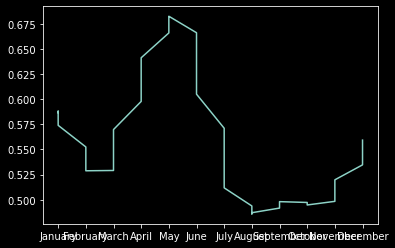

In [89]:
fig = plt.figure()
plt.plot(ea_adm_ts.Month, ea_adm_ts.Kenya_Narok)

In [66]:
narok_spl = interpolate.splrep(ea_adm_ts.Dekad, ea_adm_ts.Kenya_Narok)

In [72]:
narok_newx = np.linspace(ea_adm_ts.Dekad.min(),ea_adm_ts.Dekad.max(),200)
narok_newy = interpolate.splev(narok_newx, narok_spl)

Text(0.5, 1.0, 'Narok, Kenya')

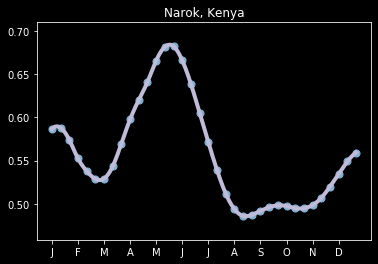

In [103]:
f, ax = plt.subplots()
ax.scatter(ea_adm_ts.Dekad, ea_adm_ts.Kenya_Narok, s = 50, c= '#81b1d2')
ax.plot(narok_newx,narok_newy, linewidth = 4, c = '#bfbbd9')
ax.set_xticks(np.arange(1,37, 3))
ax.set_xticklabels(m)
#ax.set_ylim([0.4,0.7])
ax.set_title('Narok, Kenya')

Text(0.5, 1.0, 'West Equatoria, South Sudan')

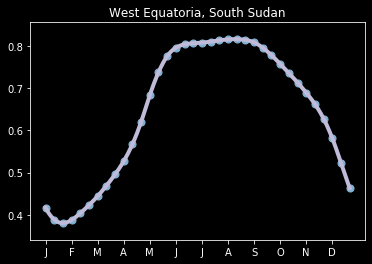

In [112]:
westeq_spl = interpolate.splrep(ea_adm_ts.Dekad, ea_adm_ts.South_Sudan_Western_Equatoria)
westeq_newx = np.linspace(ea_adm_ts.Dekad.min(),ea_adm_ts.Dekad.max(),200)
westeq_newy = interpolate.splev(westeq_newx, westeq_spl)

f, ax = plt.subplots()
ax.scatter(ea_adm_ts.Dekad, ea_adm_ts.South_Sudan_Western_Equatoria, s = 50, c= '#81b1d2')
ax.plot(westeq_newx,westeq_newy, linewidth = 4, c = '#bfbbd9')
ax.set_xticks(np.arange(1,37, 3))
ax.set_xticklabels(m)
#ax.set_ylim([0.4,0.7])
ax.set_title('West Equatoria, South Sudan')

Text(0.5, 1.0, 'Beneshangul Gumu, Ethiopia')

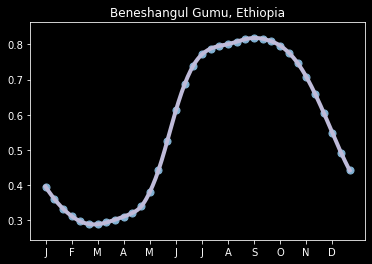

In [106]:
benegu_spl = interpolate.splrep(ea_adm_ts.Dekad, ea_adm_ts.Ethiopia_Beneshangul_Gumu)
benegu_newx = np.linspace(ea_adm_ts.Dekad.min(),ea_adm_ts.Dekad.max(),200)
benegu_newy = interpolate.splev(benegu_newx, benegu_spl)

f, ax = plt.subplots()
ax.scatter(ea_adm_ts.Dekad, ea_adm_ts.Ethiopia_Beneshangul_Gumu, s = 50, c= '#81b1d2')
ax.plot(benegu_newx,benegu_newy, linewidth = 4, c = '#bfbbd9')
ax.set_xticks(np.arange(1,37, 3))
ax.set_xticklabels(m)
#ax.set_ylim([0.4,0.7])
ax.set_title('Beneshangul Gumu, Ethiopia')

Text(0.5, 1.0, 'Gezira, Sudan')

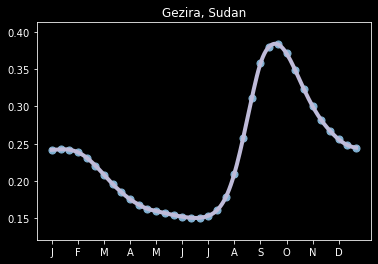

In [107]:
gezira_spl = interpolate.splrep(ea_adm_ts.Dekad, ea_adm_ts.Suda_Gezira)
gezira_newx = np.linspace(ea_adm_ts.Dekad.min(),ea_adm_ts.Dekad.max(),200)
gezira_newy = interpolate.splev(gezira_newx, gezira_spl)

f, ax = plt.subplots()
ax.scatter(ea_adm_ts.Dekad, ea_adm_ts.Suda_Gezira, s = 50, c= '#81b1d2')
ax.plot(gezira_newx,gezira_newy, linewidth = 4, c = '#bfbbd9')
ax.set_xticks(np.arange(1,37, 3))
ax.set_xticklabels(m)
#ax.set_ylim([0.4,0.7])
ax.set_title('Gezira, Sudan')

Text(0.5, 1.0, 'Central, Uganda')

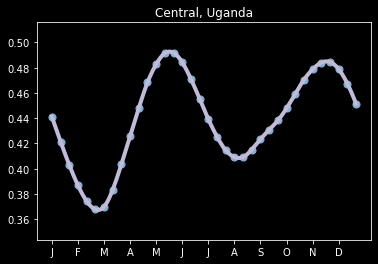

In [108]:
central_spl = interpolate.splrep(ea_adm_ts.Dekad, ea_adm_ts.Uganda_Central)
central_newx = np.linspace(ea_adm_ts.Dekad.min(),ea_adm_ts.Dekad.max(),200)
central_newy = interpolate.splev(central_newx, central_spl)

f, ax = plt.subplots()
ax.scatter(ea_adm_ts.Dekad, ea_adm_ts.Uganda_Central, s = 50, c= '#81b1d2')
ax.plot(central_newx,central_newy, linewidth = 4, c = '#bfbbd9')
ax.set_xticks(np.arange(1,37, 3))
ax.set_xticklabels(m)
#ax.set_ylim([0.4,0.7])
ax.set_title('Central, Uganda')

Text(0.5, 1.0, 'Somali, Ethiopia')

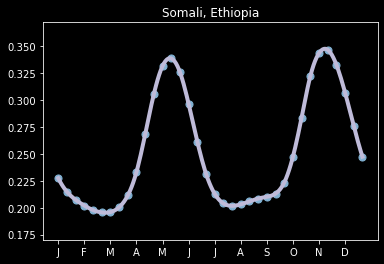

In [109]:
somali_spl = interpolate.splrep(ea_adm_ts.Dekad, ea_adm_ts.Ethiopia_Somali)
somali_newx = np.linspace(ea_adm_ts.Dekad.min(),ea_adm_ts.Dekad.max(),200)
somali_newy = interpolate.splev(somali_newx, somali_spl)

f, ax = plt.subplots()
ax.scatter(ea_adm_ts.Dekad, ea_adm_ts.Ethiopia_Somali, s = 50, c= '#81b1d2')
ax.plot(somali_newx,somali_newy, linewidth = 4, c = '#bfbbd9')
ax.set_xticks(np.arange(1,37, 3))
ax.set_xticklabels(m)
#ax.set_ylim([0.4,0.7])
ax.set_title('Somali, Ethiopia')

Text(0.5, 1.0, 'Laikipia, Kenya')

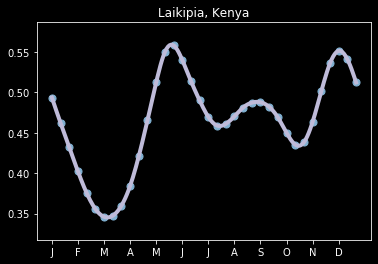

In [110]:
laikipia_spl = interpolate.splrep(ea_adm_ts.Dekad, ea_adm_ts.Kenya_Laikipia)
laikipia_newx = np.linspace(ea_adm_ts.Dekad.min(),ea_adm_ts.Dekad.max(),200)
laikipia_newy = interpolate.splev(laikipia_newx, laikipia_spl)

f, ax = plt.subplots()
ax.scatter(ea_adm_ts.Dekad, ea_adm_ts.Kenya_Laikipia, s = 50, c= '#81b1d2')
ax.plot(laikipia_newx,laikipia_newy, linewidth = 4, c = '#bfbbd9')
ax.set_xticks(np.arange(1,37, 3))
ax.set_xticklabels(m)
#ax.set_ylim([0.4,0.7])
ax.set_title('Laikipia, Kenya')

Text(0.5, 1.0, 'Singida, Tanzania')

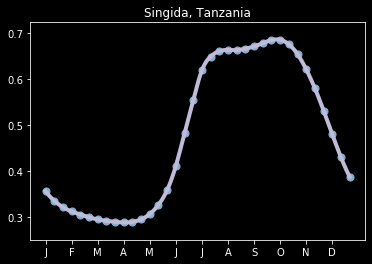

In [111]:
singida_spl = interpolate.splrep(ea_adm_ts.Dekad, ea_adm_ts.Tanzania_Singida)
singida_newx = np.linspace(ea_adm_ts.Dekad.min(),ea_adm_ts.Dekad.max(),200)
singida_newy = interpolate.splev(singida_newx, singida_spl)

f, ax = plt.subplots()
ax.scatter(ea_adm_ts.Dekad, ea_adm_ts.Tanzania_Singida, s = 50, c= '#81b1d2')
ax.plot(singida_newx,singida_newy, linewidth = 4, c = '#bfbbd9')
ax.set_xticks(np.arange(1,37, 3))
ax.set_xticklabels(m)
#ax.set_ylim([0.4,0.7])
ax.set_title('Singida, Tanzania')

Text(0.5, 1.0, 'Kenya_Turkana')

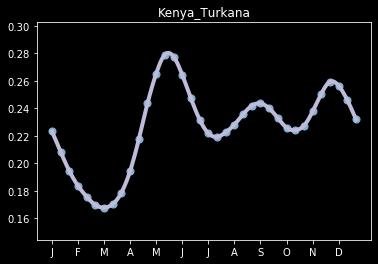

In [113]:
turkana_spl = interpolate.splrep(ea_adm_ts.Dekad, ea_adm_ts.Kenya_Turkana)
turkana_newx = np.linspace(ea_adm_ts.Dekad.min(),ea_adm_ts.Dekad.max(),200)
turkana_newy = interpolate.splev(turkana_newx, turkana_spl)

f, ax = plt.subplots()
ax.scatter(ea_adm_ts.Dekad, ea_adm_ts.Kenya_Turkana, s = 50, c= '#81b1d2')
ax.plot(turkana_newx,turkana_newy, linewidth = 4, c = '#bfbbd9')
ax.set_xticks(np.arange(1,37, 3))
ax.set_xticklabels(m)
#ax.set_ylim([0.4,0.7])
ax.set_title('Kenya_Turkana')